In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers.merge import concatenate
from keras.utils import to_categorical 
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
print(dataframe.shape)
raw_data = dataframe.values
# The last element contains the labels
labels = raw_data[:, -1]
print(labels.shape)
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(data)

#Produce test train split
x_train, x_test, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=21)

#Expand dimentions of data 
x_train = np.expand_dims(x_train, 2)
x_test = np.expand_dims(x_test, 2)

#Set labels to categorical type
train_labels = to_categorical(train_labels)
print(train_labels.shape)
test_labels = to_categorical(test_labels)


(4998, 141)
(4998,)
(3498,)
(3498, 2)


'\nprint("ptb_train_X shape=" +str(x_train.shape))\nprint("ptb_train_y shape=" +str(train_labels.shape))\nprint("ptb_testX shape=" +str(x_test.shape))\nprint("ptb_testy shape=" +str(test_labels.shape))\nprint(test_labels)\n'

Define LSTM model with in input of 64 neurons, softmax will be used to calculate the probability of the predicted labels alongside 2 neurons. Probability for each class.

Dropout layer of 0.3 is added

In [ ]:


lstm_model = Sequential()
#Define input shape to be the same as the dataset
lstm_model.add(LSTM(64, input_shape=(140,1)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(2, activation = 'softmax'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


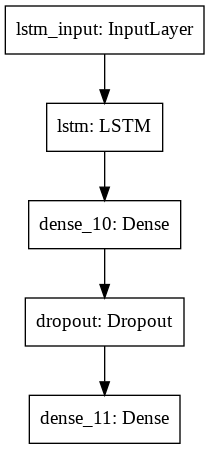

In [ ]:
plot_model(lstm_model)

In [ ]:
#Define model with adam optimiser and test over 100 epochs

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
lstm_model_history = lstm_model.fit(x_train, train_labels, epochs = 100, batch_size = 100, validation_data = (x_train, train_labels))


Epoch 1/100
35/35 [==============================] - 6s 134ms/step - loss: 0.5758 - accuracy: 0.7742 - mae: 0.3766 - val_loss: 0.2545 - val_accuracy: 0.9200 - val_mae: 0.0872
Epoch 2/100
35/35 [==============================] - 4s 110ms/step - loss: 0.2241 - accuracy: 0.9344 - mae: 0.0738 - val_loss: 0.1353 - val_accuracy: 0.9500 - val_mae: 0.0511
Epoch 3/100
35/35 [==============================] - 4s 112ms/step - loss: 0.1201 - accuracy: 0.9551 - mae: 0.0450 - val_loss: 0.0738 - val_accuracy: 0.9657 - val_mae: 0.0327
Epoch 4/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0765 - accuracy: 0.9717 - mae: 0.0309 - val_loss: 0.0628 - val_accuracy: 0.9786 - val_mae: 0.0251
Epoch 5/100
35/35 [==============================] - 4s 112ms/step - loss: 0.0586 - accuracy: 0.9791 - mae: 0.0229 - val_loss: 0.0439 - val_accuracy: 0.9843 - val_mae: 0.0164
Epoch 6/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0478 - accuracy: 0.9841 - mae: 0.0172 - val_loss

ptb_train_X = train_ptb.loc[:, train_ptb.columns != 187]
ptb_train_y = train_ptb.loc[:, train_ptb.columns == 187]
ptb_train_y = to_categorical(ptb_train_y)
ptb_testX = test_ptb.loc[:, test_ptb.columns != 187]
ptb_testy = test_ptb.loc[:, test_ptb.columns == 187]

In [ ]:
#Compile the model again with the stochastic gradient descent


lstm_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
lstm_model_history_SGD = lstm_model.fit(x_train, train_labels, epochs = 100, batch_size = 100, validation_data = (x_train, train_labels))


Epoch 1/100
35/35 [==============================] - 6s 123ms/step - loss: 0.6940 - accuracy: 0.6230 - mae: 0.5001 - val_loss: 0.6667 - val_accuracy: 0.8656 - val_mae: 0.4729
Epoch 2/100
35/35 [==============================] - 4s 112ms/step - loss: 0.6594 - accuracy: 0.8369 - mae: 0.4647 - val_loss: 0.6343 - val_accuracy: 0.8694 - val_mae: 0.4384
Epoch 3/100
35/35 [==============================] - 4s 111ms/step - loss: 0.6265 - accuracy: 0.8695 - mae: 0.4296 - val_loss: 0.6046 - val_accuracy: 0.8719 - val_mae: 0.4058
Epoch 4/100
35/35 [==============================] - 4s 110ms/step - loss: 0.5974 - accuracy: 0.8773 - mae: 0.3975 - val_loss: 0.5756 - val_accuracy: 0.8754 - val_mae: 0.3736
Epoch 5/100
35/35 [==============================] - 4s 111ms/step - loss: 0.5694 - accuracy: 0.8728 - mae: 0.3662 - val_loss: 0.5453 - val_accuracy: 0.8779 - val_mae: 0.3400
Epoch 6/100
35/35 [==============================] - 4s 110ms/step - loss: 0.5378 - accuracy: 0.8792 - mae: 0.3317 - val_loss

Text(0, 0.5, 'Accuracy')

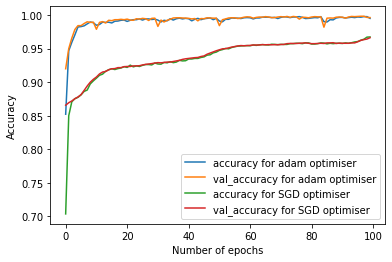

In [ ]:
Return plot for both SGD and Adam optimiser


plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.plot(lstm_model_history_SGD.history['accuracy'])
plt.plot(lstm_model_history_SGD.history['val_accuracy'])
plt.legend(["accuracy for adam optimiser","val_accuracy for adam optimiser", "accuracy for SGD optimiser", "val_accuracy for SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')



Text(0.5, 0, 'Number of epochs')

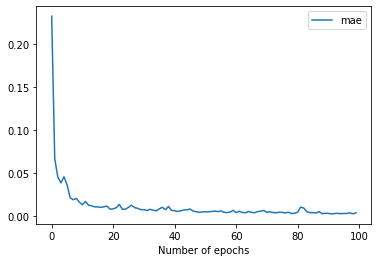

In [ ]:
plt.plot(lstm_model_history.history['mae'])

plt.legend(["mae","val_accuracy"])
plt.xlabel('Number of epochs')

Text(0, 0.5, 'Loss')

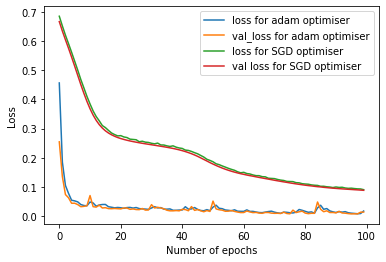

In [ ]:
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.plot(lstm_model_history_SGD.history['loss'])
plt.plot(lstm_model_history_SGD.history['val_loss'])
plt.legend(["loss for adam optimiser","val_loss for adam optimiser", "loss for SGD optimiser", "val loss for SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

'              precision    recall  f1-score   support\n\n           0       0.99      0.93      0.96       640\n           1       0.95      1.00      0.97       860\n\n    accuracy                           0.97      1500\n   macro avg       0.97      0.96      0.96      1500\nweighted avg       0.97      0.97      0.97      1500\n'

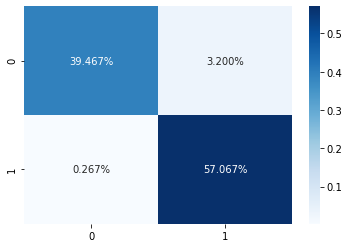

In [ ]:
Compute classification metrics for each model


from sklearn.metrics import classification_report
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=lstm_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)

lstm_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(lstm_model_cf_matrix/np.sum(lstm_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')

classification_report(y_true, prediction)

ResNet 50

In [ ]:
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv1D(filters = F1, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(filters = F2, kernel_size = f, activation='relu', strides = 1, padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(filters = F3, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)

    #Perform batch normalisation
    X = BatchNormalization()(X)


    #Input of the skip connection
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

    

In [ ]:
  

#Define convolutional blocks

def convolutional_block(X, f, filters, s = 2):
    F1, F2, F3 = filters
    
    X_shortcut = X

    #Perform batch normalisation after each convolutional layer
    X = Conv1D(F1, 1, activation='relu', strides = s)(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(F2, f, activation='relu', strides = 1,padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(F3, 1, strides = 1)(X)
    X = BatchNormalization()(X)

    X_shortcut = Conv1D(F3, 1, strides = s)(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X


In [ ]:
def ResNet50(input_shape = (140,1)):
    
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)
    
    X = Conv1D(64, 7, activation='relu', strides = 2)(X)
    X = BatchNormalization()(X)
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)

    #Uses 3 sets of filters size 64 x 64 x 256
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])
    
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    

    return model


In [ ]:
resNet50_model = ResNet50(input_shape = (140,1))
#resNet50_model_SGD = ResNet50_SGD(input_shape = (140,1))
resNet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 140, 1)]     0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 146, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 70, 64)       512         zero_padding1d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 70, 64)       256         conv1d[0][0]                     
___________________________________________________________________________________________

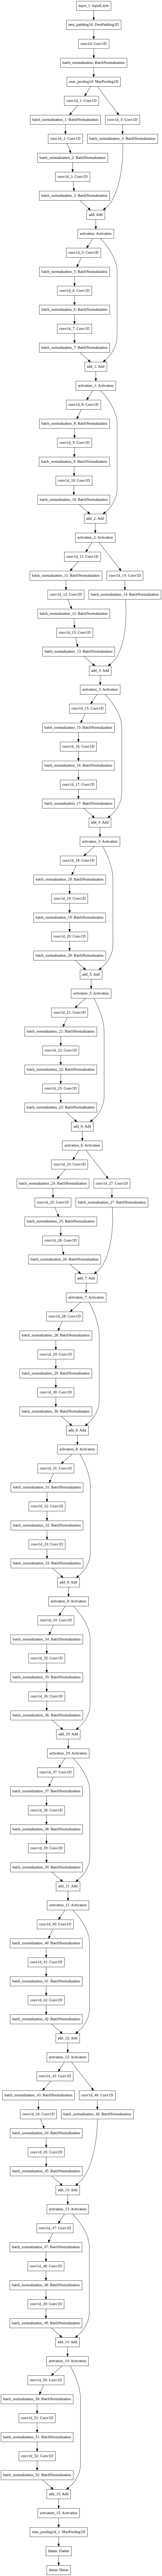

In [ ]:
plot_model(resNet50_model)

In [ ]:
#Compile the model utilising the adam optimiser

resNet50_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Store history of the results
resNet50_model_history = resNet50_model.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
35/35 [==============================] - 299s 8s/step - loss: 0.8126 - accuracy: 0.8002 - val_loss: 1.5883 - val_accuracy: 0.4267
Epoch 2/10
35/35 [==============================] - 288s 8s/step - loss: 0.1394 - accuracy: 0.9724 - val_loss: 2.3854 - val_accuracy: 0.4267
Epoch 3/10
35/35 [==============================] - 283s 8s/step - loss: 0.0866 - accuracy: 0.9803 - val_loss: 3.5390 - val_accuracy: 0.4267
Epoch 4/10
35/35 [==============================] - 284s 8s/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 4.9334 - val_accuracy: 0.4267
Epoch 5/10
35/35 [==============================] - 284s 8s/step - loss: 0.0216 - accuracy: 0.9905 - val_loss: 7.1559 - val_accuracy: 0.4267
Epoch 6/10
35/35 [==============================] - 282s 8s/step - loss: 0.0346 - accuracy: 0.9877 - val_loss: 6.5605 - val_accuracy: 0.4267
Epoch 7/10
35/35 [==============================] - 283s 8s/step - loss: 0.0232 - accuracy: 0.9940 - val_loss: 6.6650 - val_accuracy: 0.4267
Epoch 8/10
35

In [ ]:
#Compute model using SGD

resNet50_model_SGD.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
resNet50_model_history_SGD = resNet50_model_SGD.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
35/35 [==============================] - 223s 6s/step - loss: 2.9069 - accuracy: 0.6635 - val_loss: 201.1805 - val_accuracy: 0.4413
Epoch 2/10
35/35 [==============================] - 211s 6s/step - loss: 0.0925 - accuracy: 0.9777 - val_loss: 21.3239 - val_accuracy: 0.4633
Epoch 3/10
35/35 [==============================] - 211s 6s/step - loss: 0.0838 - accuracy: 0.9776 - val_loss: 3.4790 - val_accuracy: 0.7320
Epoch 4/10
35/35 [==============================] - 211s 6s/step - loss: 0.0735 - accuracy: 0.9800 - val_loss: 1.1896 - val_accuracy: 0.8600
Epoch 5/10
35/35 [==============================] - 211s 6s/step - loss: 0.0595 - accuracy: 0.9798 - val_loss: 0.3301 - val_accuracy: 0.9400
Epoch 6/10
35/35 [==============================] - 211s 6s/step - loss: 0.0512 - accuracy: 0.9833 - val_loss: 0.1593 - val_accuracy: 0.9700
Epoch 7/10
35/35 [==============================] - 211s 6s/step - loss: 0.0390 - accuracy: 0.9896 - val_loss: 0.1137 - val_accuracy: 0.9780
Epoch 8/10

Text(0, 0.5, 'Accuracy')

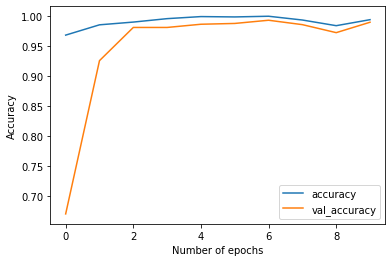

In [ ]:
#Plot accuracy  for each optimiser

plt.plot(resNet50_model_history.history['accuracy'])
plt.plot(resNet50_model_history.history['val_accuracy'])
plt.plot(resNet50_model_history_SGD.history['accuracy using SGD optimiser'])
plt.plot(resNet50_model_history_SGD.history['val_accuracy using SGD optimiser'])
plt.legend(["accuracy using adam optimiser", "val_accuracy using adam optimiser", "accuracy using SGD optimiser","val_accuracy using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

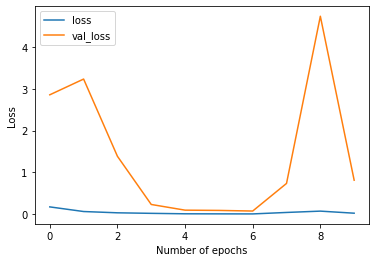

In [ ]:
#Plot loss for each optimiser

plt.plot(resNet50_model_history.history['loss'])
plt.plot(resNet50_model_history.history['val_loss'])
plt.plot(resNet50_model_history_SGD.history['loss'])
plt.plot(resNet50_model_history_SGD.history['val_loss'])
plt.legend(["loss using adam optimiser", "val_loss using adam optimiser", "loss using SGD optimiser","val_loss using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [ ]:
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=resNet50_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)
print(prediction)

y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba_SDG=resNet50_model_SGD.predict(x_test)
prediction_SDG=np.argmax(prediction_proba_SDG,axis=1)
print(prediction)

[1 0 1 ... 1 1 1]
[1 0 1 ... 1 1 1]


'              precision    recall  f1-score   support\n\n           0       0.99      0.96      0.98       640\n           1       0.97      1.00      0.98       860\n\n    accuracy                           0.98      1500\n   macro avg       0.98      0.98      0.98      1500\nweighted avg       0.98      0.98      0.98      1500\n'

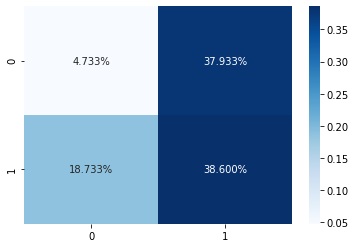

In [ ]:
#Compute classification metrics

from sklearn.metrics import classification_report
resNet50_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(resNet50_model_cf_matrix/np.sum(resNet50_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')
#classification_report(y_true, prediction)
classification_report(y_true, prediction_SDG)

Inception model

In [ ]:
def inception_block(prev_layer):
    
    conv1=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    
    conv3=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    conv3=Conv1D(filters = 64, kernel_size = 3, activation='relu', padding = 'same')(conv3)
    
    conv5=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    conv5=Conv1D(filters = 64, kernel_size = 5, activation='relu', padding = 'same')(conv5)
    
    pool= MaxPool1D(pool_size=3, strides=1, padding='same')(prev_layer)
    convmax=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(pool)
    
    layer_out = concatenate([conv1, conv3, conv5, convmax], axis=1)
    return layer_out

In [ ]:
def inception_model(input_shape):
    X_input=Input(input_shape)
    
    X = Conv1D(filters = 64, kernel_size = 7, activation='relu', padding = 'same')(X_input)
    X = MaxPool1D(pool_size=3, strides=2, padding='same')(X)
    
    X = Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(X)
    
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    
    X = MaxPool1D(pool_size=7, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Inception')
    
    return model

In [ ]:
inception_model = inception_model(input_shape = (140,1))
inception_model.summary()

Model: "Inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 140, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_53 (Conv1D)              (None, 140, 64)      512         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 70, 64)       0           conv1d_53[0][0]                  
__________________________________________________________________________________________________
conv1d_54 (Conv1D)              (None, 70, 64)       4160        max_pooling1d_2[0][0]            
__________________________________________________________________________________________

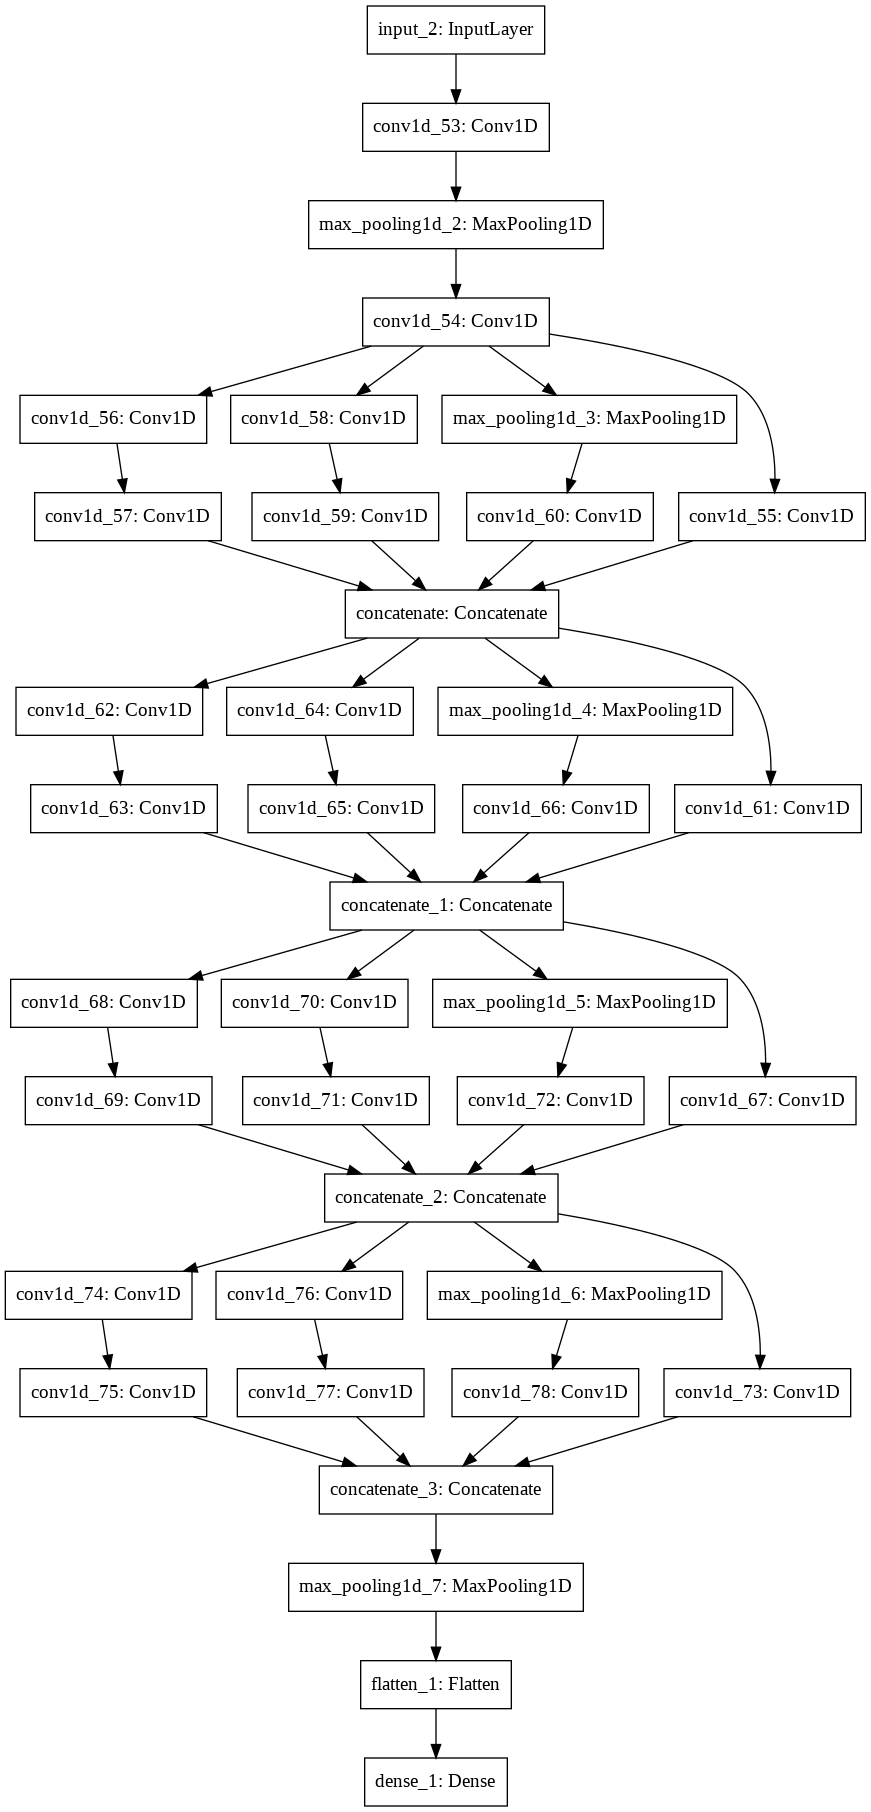

In [ ]:
plot_model(inception_model)

In [ ]:
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
inception_model_history = inception_model.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
35/35 [==============================] - 247s 7s/step - loss: 0.3322 - accuracy: 0.8770 - val_loss: 0.0441 - val_accuracy: 0.9900
Epoch 2/10
35/35 [==============================] - 258s 7s/step - loss: 0.0485 - accuracy: 0.9873 - val_loss: 0.0354 - val_accuracy: 0.9927
Epoch 3/10
35/35 [==============================] - 251s 7s/step - loss: 0.0231 - accuracy: 0.9953 - val_loss: 0.0332 - val_accuracy: 0.9913
Epoch 4/10
35/35 [==============================] - 264s 8s/step - loss: 0.0323 - accuracy: 0.9930 - val_loss: 0.0299 - val_accuracy: 0.9920
Epoch 5/10
35/35 [==============================] - 254s 7s/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0308 - val_accuracy: 0.9927
Epoch 6/10
35/35 [==============================] - 254s 7s/step - loss: 0.0194 - accuracy: 0.9956 - val_loss: 0.0285 - val_accuracy: 0.9940
Epoch 7/10
35/35 [==============================] - 255s 7s/step - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.0390 - val_accuracy: 0.9913
Epoch 8/10
35

Text(0, 0.5, 'Accuracy')

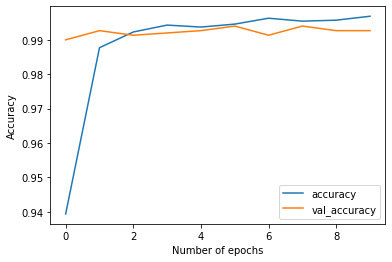

In [ ]:
plt.plot(inception_model_history.history['accuracy'])
plt.plot(inception_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

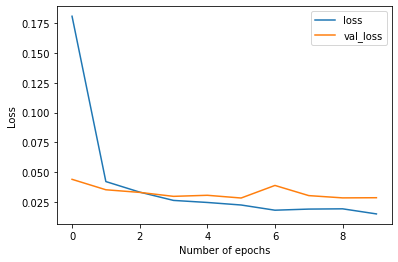

In [ ]:
plt.plot(inception_model_history.history['loss'])
plt.plot(inception_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [ ]:
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=inception_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       640\n           1       0.99      1.00      0.99       860\n\n    accuracy                           0.99      1500\n   macro avg       0.99      0.99      0.99      1500\nweighted avg       0.99      0.99      0.99      1500\n'

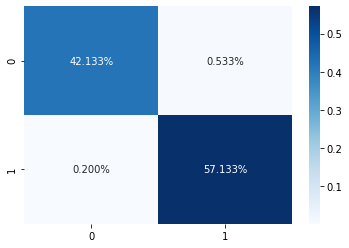

In [ ]:
inception_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(inception_model_cf_matrix/np.sum(inception_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')
classification_report(y_true, prediction)